Final Paper:
Name:
AI


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('')

In [3]:
data.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [4]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
df = data[['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name']]

In [6]:
df.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [7]:
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [8]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
df.dropna(axis=1)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
...,...,...,...,...,...
23481,1104,34,5,1,0
23482,862,48,3,1,0
23483,1104,31,3,0,1
23484,1084,28,3,1,2


In [11]:
df.fillna(df.mean())

C:\Users\usama\AppData\Local\Temp/ipykernel_7616/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [12]:
len(df)

23486

In [13]:
df.Title.isna()

0         True
1         True
2        False
3        False
4        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Name: Title, Length: 23486, dtype: bool

In [14]:
da = data[~df.Title.isna()]

In [15]:
len(da)

19676

In [16]:
# x['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
# Q1 = data['funding_total_usd'].quantile(0.25)


In [22]:
da

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [23]:
df = pd.DataFrame(da)

In [31]:
df1 = df.drop(['Unnamed: 0'],axis=1)

In [37]:
# handle Categorical values if needed
data_num = df1[['Clothing ID', 'Age','Rating','Recommended IND', 'Positive Feedback Count']]
data_nonNum = df1[['Title', 'Review Text','Division Name','Department Name', 'Class Name']]

In [39]:
data_nonNum

,Title,Review Text,Division Name,Department Name,Class Name
2,Some major design flaws,I had such high hopes for this dress and reall...,General,Dresses,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",General Petite,Bottoms,Pants
4,Flattering shirt,This shirt is very flattering to all due to th...,General,Tops,Blouses
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",General,Dresses,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,General Petite,Tops,Knits
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,General Petite,Dresses,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",General Petite,Tops,Knits
23483,"Cute, but see through","This fit well, but the top was very see throug...",General Petite,Dresses,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,General,Dresses,Dresses


In [40]:
from sklearn.model_selection import train_test_split
# Creating Dummy
dummy = pd.get_dummies(data_nonNum ,columns=['Title', 'Review Text','Division Name','Department Name', 'Class Name'])
dummy

,"Title_""beach business""","Title_""formal pajamas""","Title_""go to"" please offer a maxi for mature customers.","Title_""go to"" tee for sz 10+ women","Title_""long and warm""","Title_""perfect with jeans""","Title_""tweed"" dress","Title_""won't stretch"" tags are misleading",Title_#1 stunna,Title_$200 piece of polyester,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Concat
CarNewData = pd.concat([data_num.iloc[:,1:],dummy],axis=1)
CarNewData

,Age,Rating,Recommended IND,Positive Feedback Count,"Title_""beach business""","Title_""formal pajamas""","Title_""go to"" please offer a maxi for mature customers.","Title_""go to"" tee for sz 10+ women","Title_""long and warm""","Title_""perfect with jeans""",...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
2,60,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,47,5,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,49,2,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,39,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,48,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23483,31,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23484,28,3,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# # independent
# xn = [dummy.gearbox_Automatic]

# xxn = [dummy.gearbox_Manual]
# type(xxn)
# x = np.array(xn)
# type(x)
# # Dependent
# yn = [df.price]
# type(yn)

# y = np.array(yn)
# type(y)

# x = final.drop(['Price'],axis=1)

# # Classification Algorithm for predicton
# from sklearn.linear_model import LinearRegression

# LinReg  = LinearRegression()
# LinReg.fit(x,y)

# y_pred= LinReg.predict(x)
# y_pred


In [45]:
data_num

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
5,1080,49,2,0,4
6,858,39,5,1,1
...,...,...,...,...,...
23481,1104,34,5,1,0
23482,862,48,3,1,0
23483,1104,31,3,0,1
23484,1084,28,3,1,2


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models

ModuleNotFoundError: No module named 'tensorflow'

In [54]:
x = df.iloc[:,0:4].values
y = df.iloc[:,5].values


In [55]:

print(x.shape)
print(y.shape)

(19676, 4)
(19676,)


In [56]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y1

array([2, 4, 4, ..., 2, 2, 4], dtype=int64)

In [57]:
y = pd.get_dummies(y1).values
print(y[0:5])

[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 0 1]]


In [62]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
df1

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [61]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10,activation = 'relu'),
#     tf.keras.layers.Dense(10,activation = 'relu'),
#     tf.keras.layers.Dense(3,activation = 'softmax')
# ])


# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size = 50, epochs = 100)
# loss,accuracy = model.evalute(X_test)



<AxesSubplot:ylabel='Frequency'>

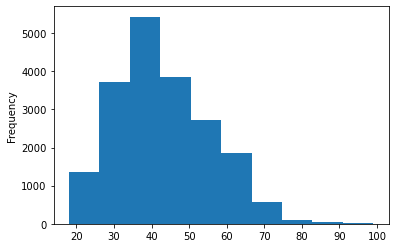

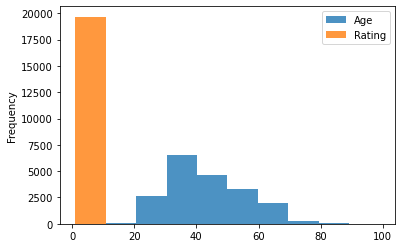

In [64]:
df.Age.plot.hist()
df[['Age','Rating']].plot.hist(alpha=0.80)

<AxesSubplot:xlabel='Age', ylabel='Rating'>

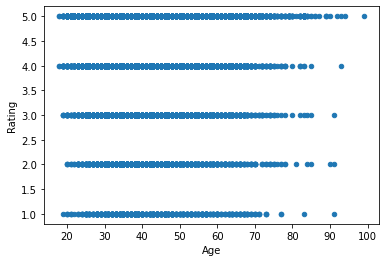

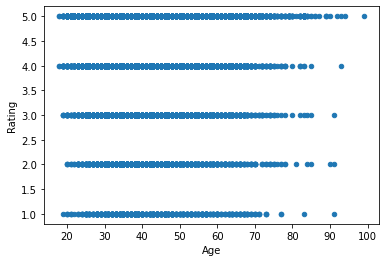

In [65]:
# Scatter Plot
df.plot.scatter('Age','Rating')
df[['Age','Rating']].plot.scatter('Age','Rating')

<AxesSubplot:ylabel='Age'>

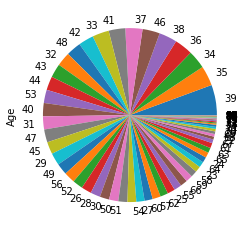

In [75]:
df['Age'].value_counts().plot.pie()